# Table of Contents

- Human Resources Department: Employee Turnover Prediction
    - Understanding the Business Problem
    - Loading Data Files
    - Exploring and Visualizing the Dataset
    - Data Preprocessing: Splitting and Cleaning
    - Logistic Regression: Model Training and Evaluation
    - Random Forest: Model Training and Evaluation
- Marketing Department: Customer Segmentation for Targeted Campaigns
    - Understanding the Business Problem
    - Loading Data Files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Human Resources Department: Employee Turnover Prediction

## Understanding the Business Problem

The HR team has collected employee data and aims to use predictive modelling to predict which employees are at risk of leaving.

## Loading Data Files

In [4]:
employee_df = pd.read_csv('../data/raw/human-resources-department.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploring and Visualizing the Dataset

In [8]:
# Since 'Attrition,' 'OverTime,' and 'Over18' are binary columns,
# let's convert them into integers before conducting any visualizations.

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)

employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


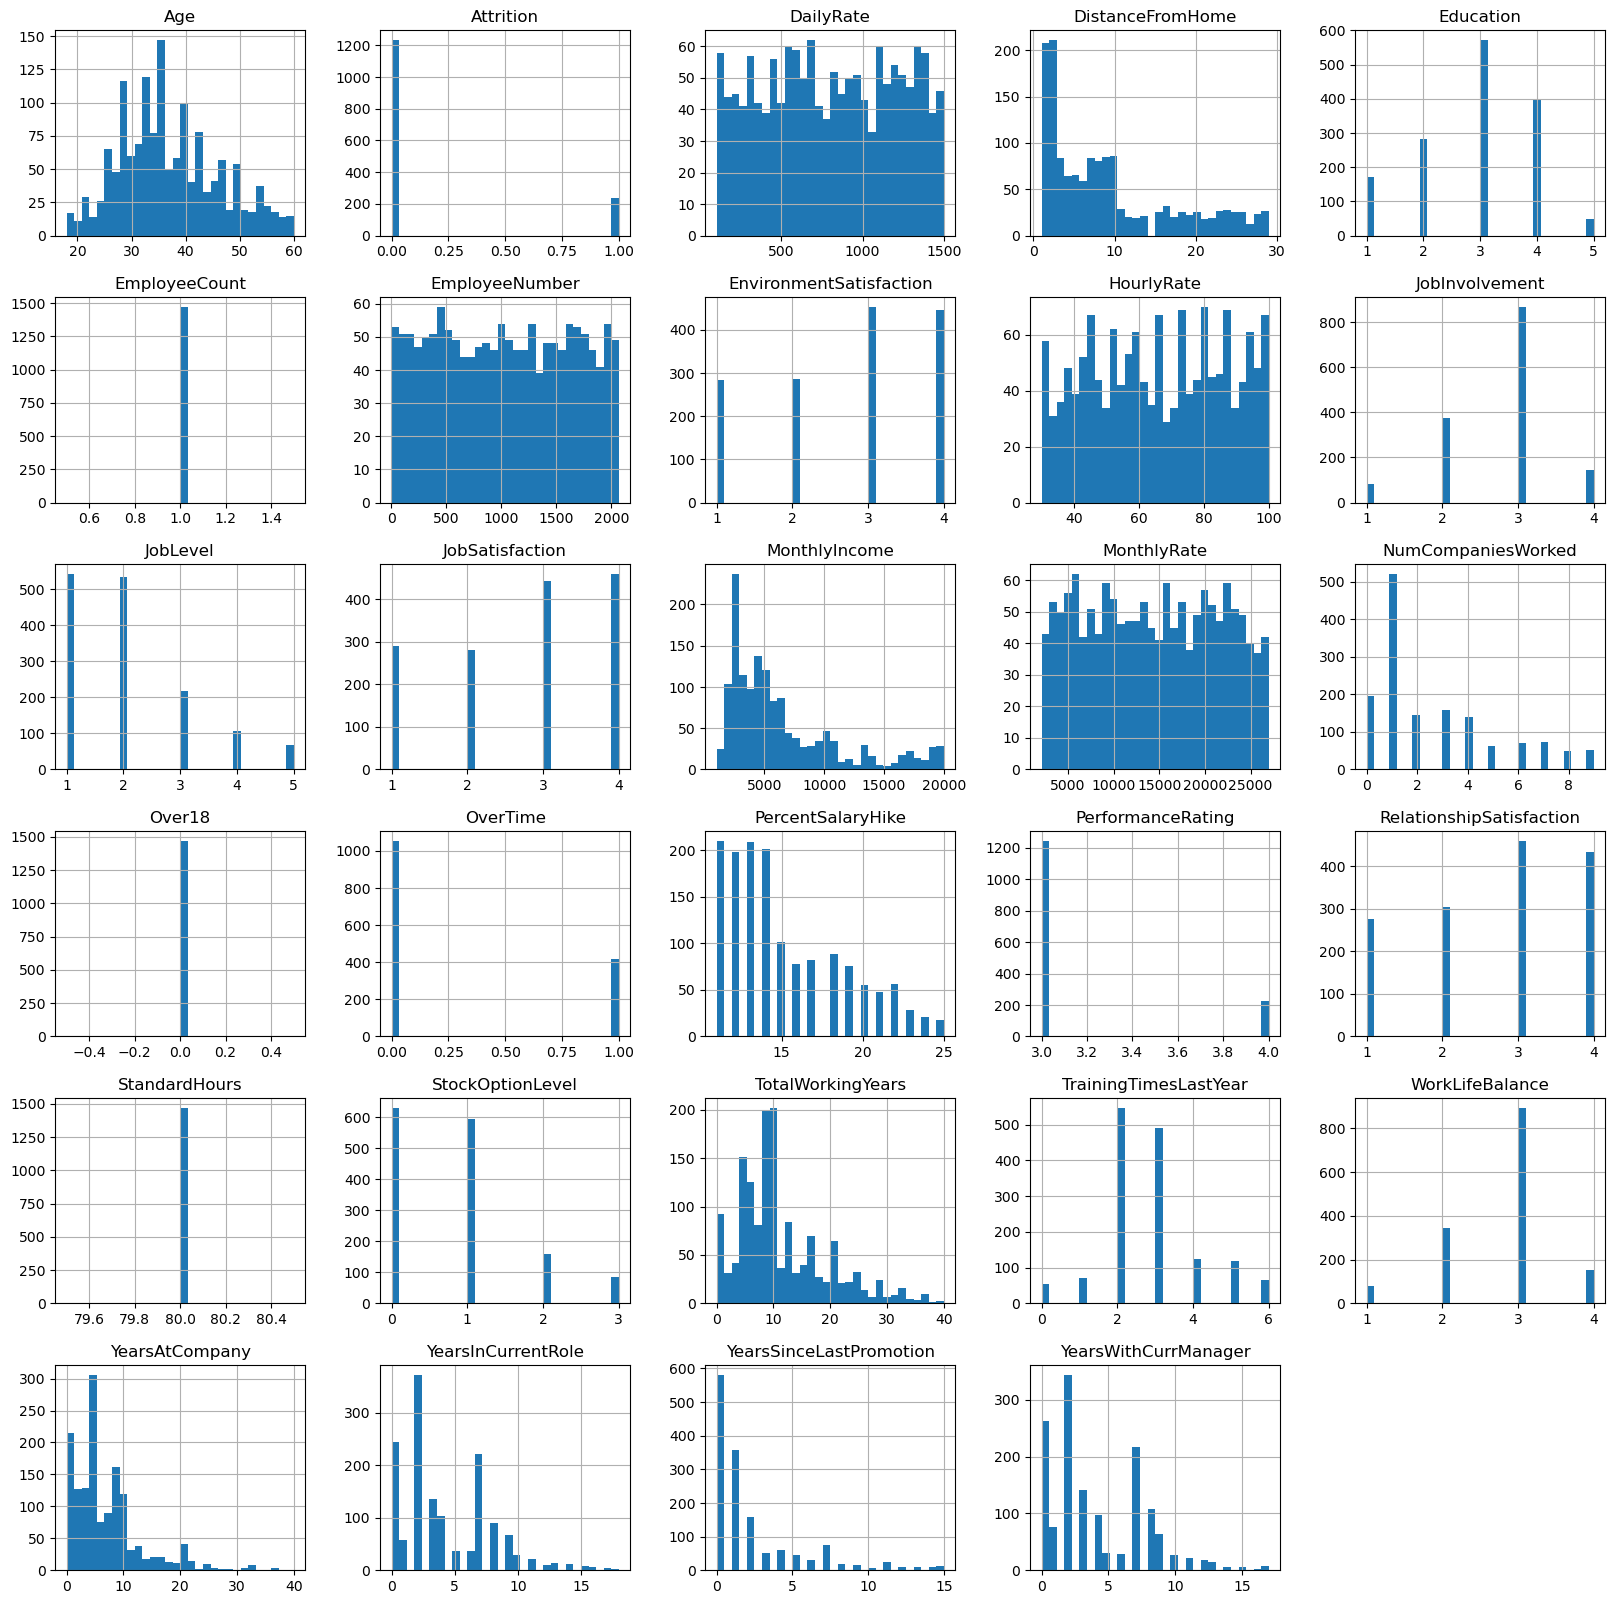

In [9]:
employee_df.hist(bins=30, figsize=(20,20));

# Some features like 'MonthlyIncome' and 'TotalWorkingYears' have a tail-heavy distribution.

In [10]:
employee_df['EmployeeNumber'].duplicated().sum()

# There are no duplicated values in the 'EmployeeNumber' column.

0

In [11]:
# Let's remove 'EmployeeCount,' 'StandardHours,' and 'Over18' since they do not vary among employees.
# Additionally, we should drop 'EmployeeNumber' because it doesn't offer meaningful information or patterns
# to predict a target variable. Including such identifiers in a model can cause overfitting,
# where the model memorizes specific employees rather than learning generalizable patterns.

employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],
                 axis=1, inplace=True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# How many employees have left the company?

employees_left = employee_df[employee_df['Attrition'] == 1]
employees_stayed = employee_df[employee_df['Attrition'] == 0]

total_employees = len(employee_df)
print(f'Total number of employees: {total_employees}')

num_employees_left = len(employees_left)
pct_employees_left = num_employees_left / total_employees * 100
print(f'Number of employees who left the company: {num_employees_left} ({pct_employees_left:.2f}%)')

num_employees_stayed = len(employees_stayed)
pct_employees_stayed = num_employees_stayed / total_employees * 100
print(f'Number of employees who stayed with the company: {num_employees_stayed} ({pct_employees_stayed:.2f}%)')

# The dataset is imbalanced.

Total number of employees: 1470
Number of employees who left the company: 237 (16.12%)
Number of employees who stayed with the company: 1233 (83.88%)


In [13]:
employees_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
employees_stayed.describe()

# Let's compare the average and standard deviation of the employees who stayed
# and those who left:
# 'Age': The average age of the employees who stayed is higher than that of those who left.
# 'DailyRate': The daily rate of the employees who stayed is higher.
# 'DistanceFromHome': Employees who stayed live closer to work.
# 'EnvironmentSatisfaction' and 'JobSatisfaction': Employees who stayed generally
# have higher environment and job satisfaction.
# 'StockOptionLevel': Employees who stayed tend to have a higher stock option level.

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


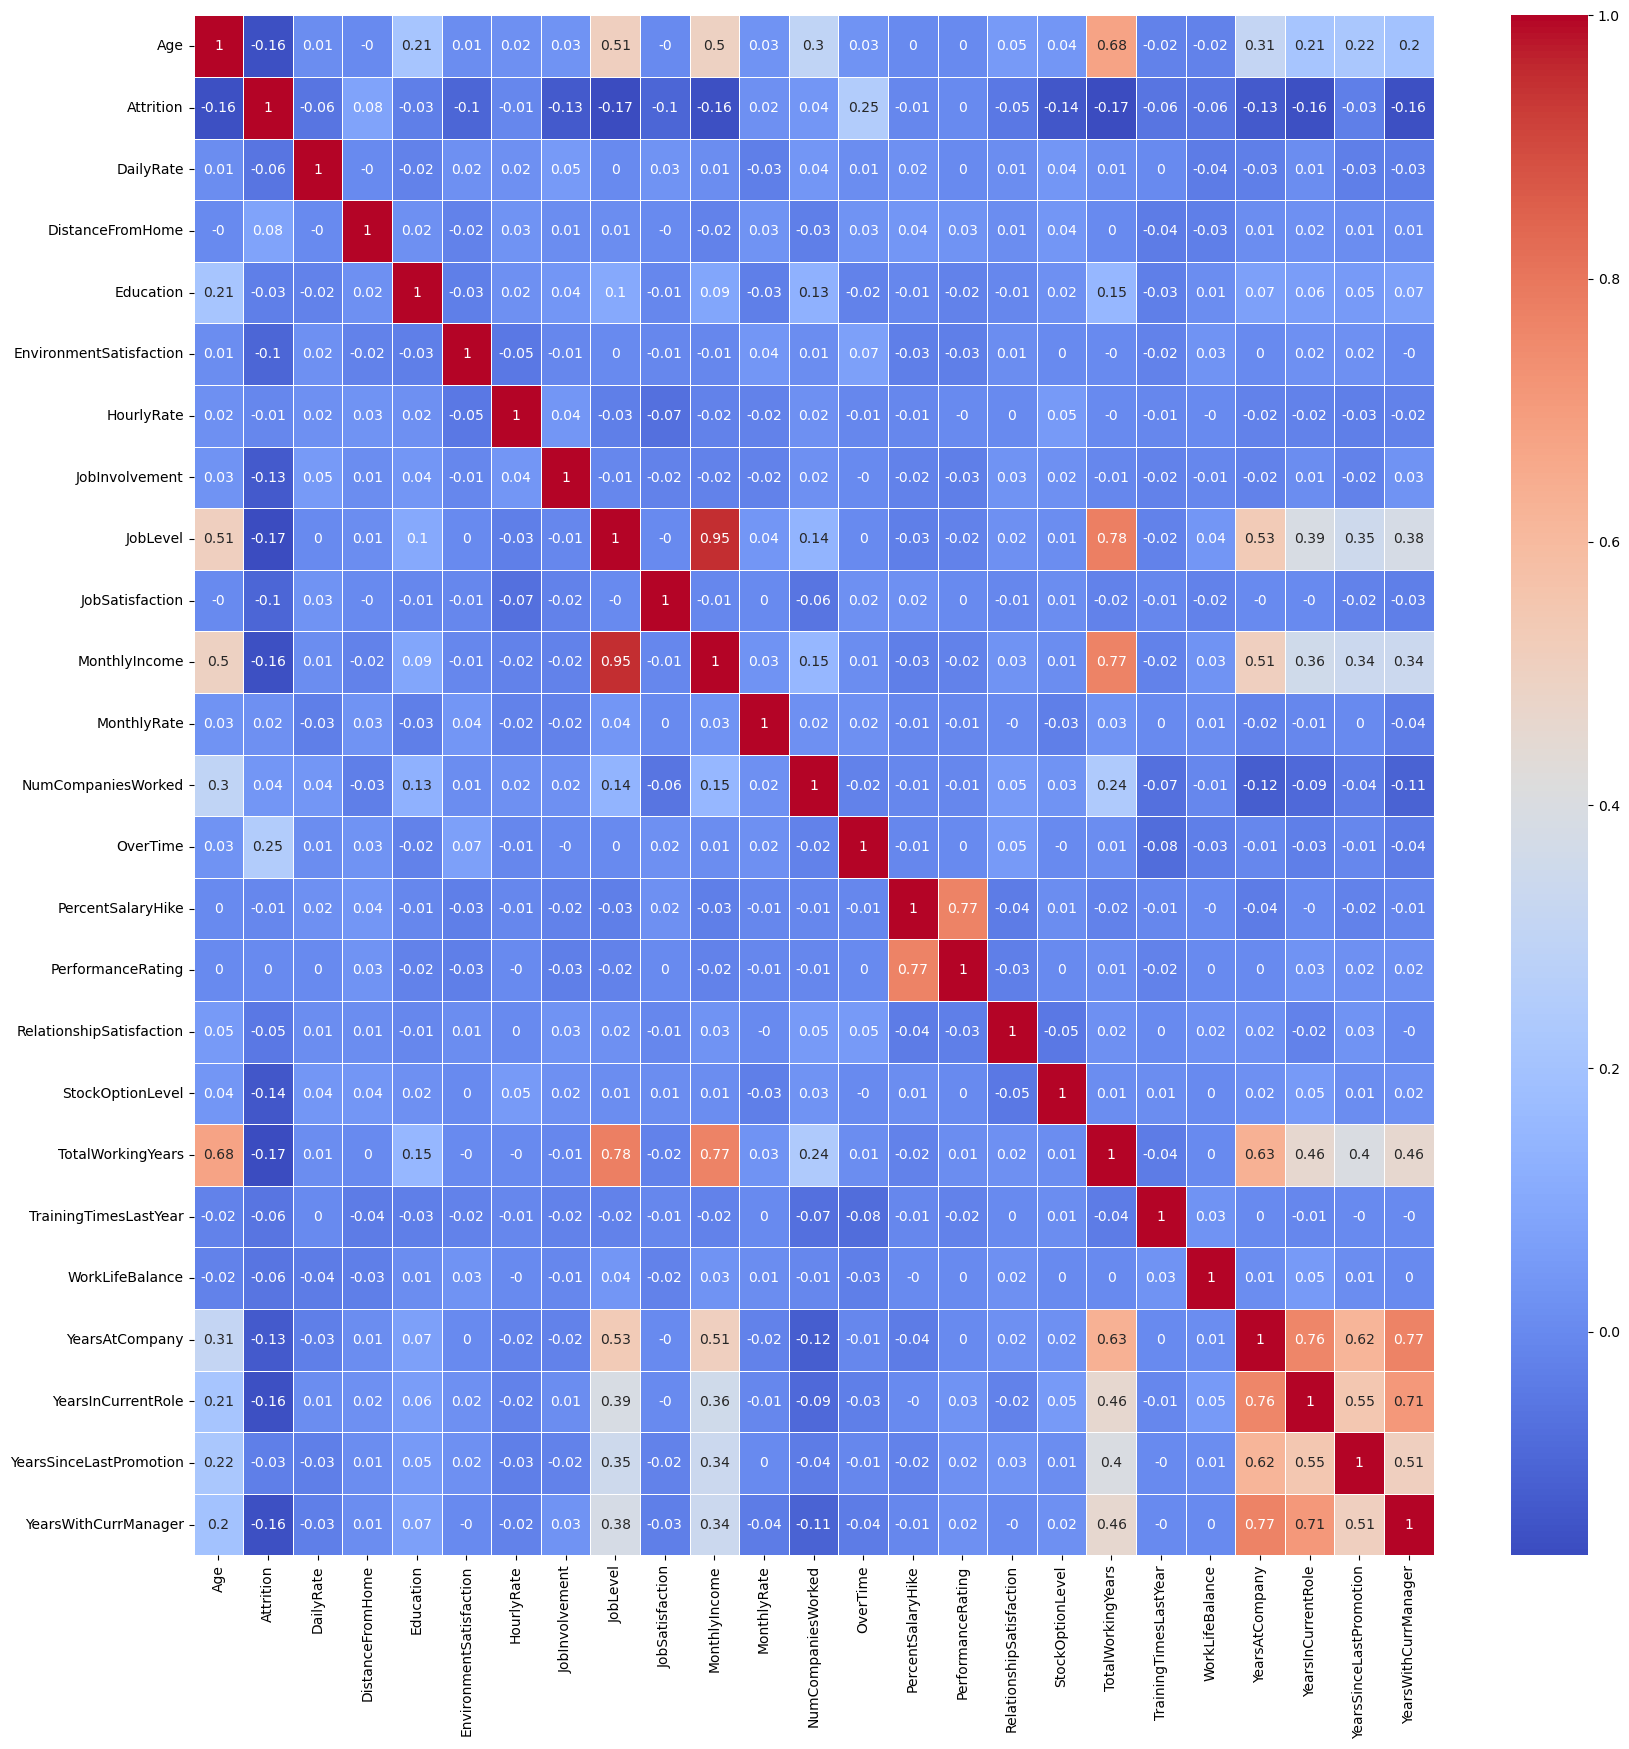

In [15]:
numeric_employee_df = employee_df.select_dtypes(include=['number'])
correlations = numeric_employee_df.corr()
correlations_rounded = correlations.round(2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations_rounded, annot=True, cmap='coolwarm', linewidths=0.5);

# 'Age' is strongly correlated with 'TotalWorkingYears' (0.68), 'JobLevel' (0.51),
# and 'MonthlyIncome' (0.50).
# 'Attrition' is negatively correlated with 'JobLevel' (-0.17), 'YearsAtCompany' (-0.13),
# and 'JobSatisfaction' (-0.10).
# 'JobSatisfaction' and 'EnvironmentSatisfaction' correlate negatively with
# 'Attrition' (-0.10).
# 'YearsAtCompany' has strong positive correlations with 'YearsInCurrentRole' (0.76)
# and 'YearsWithCurrManager' (0.77).
# 'DistanceFromHome' has a slight positive correlation with 'Attrition' (0.08).
# 'OverTime' is positively correlated with 'Attrition' (0.25).

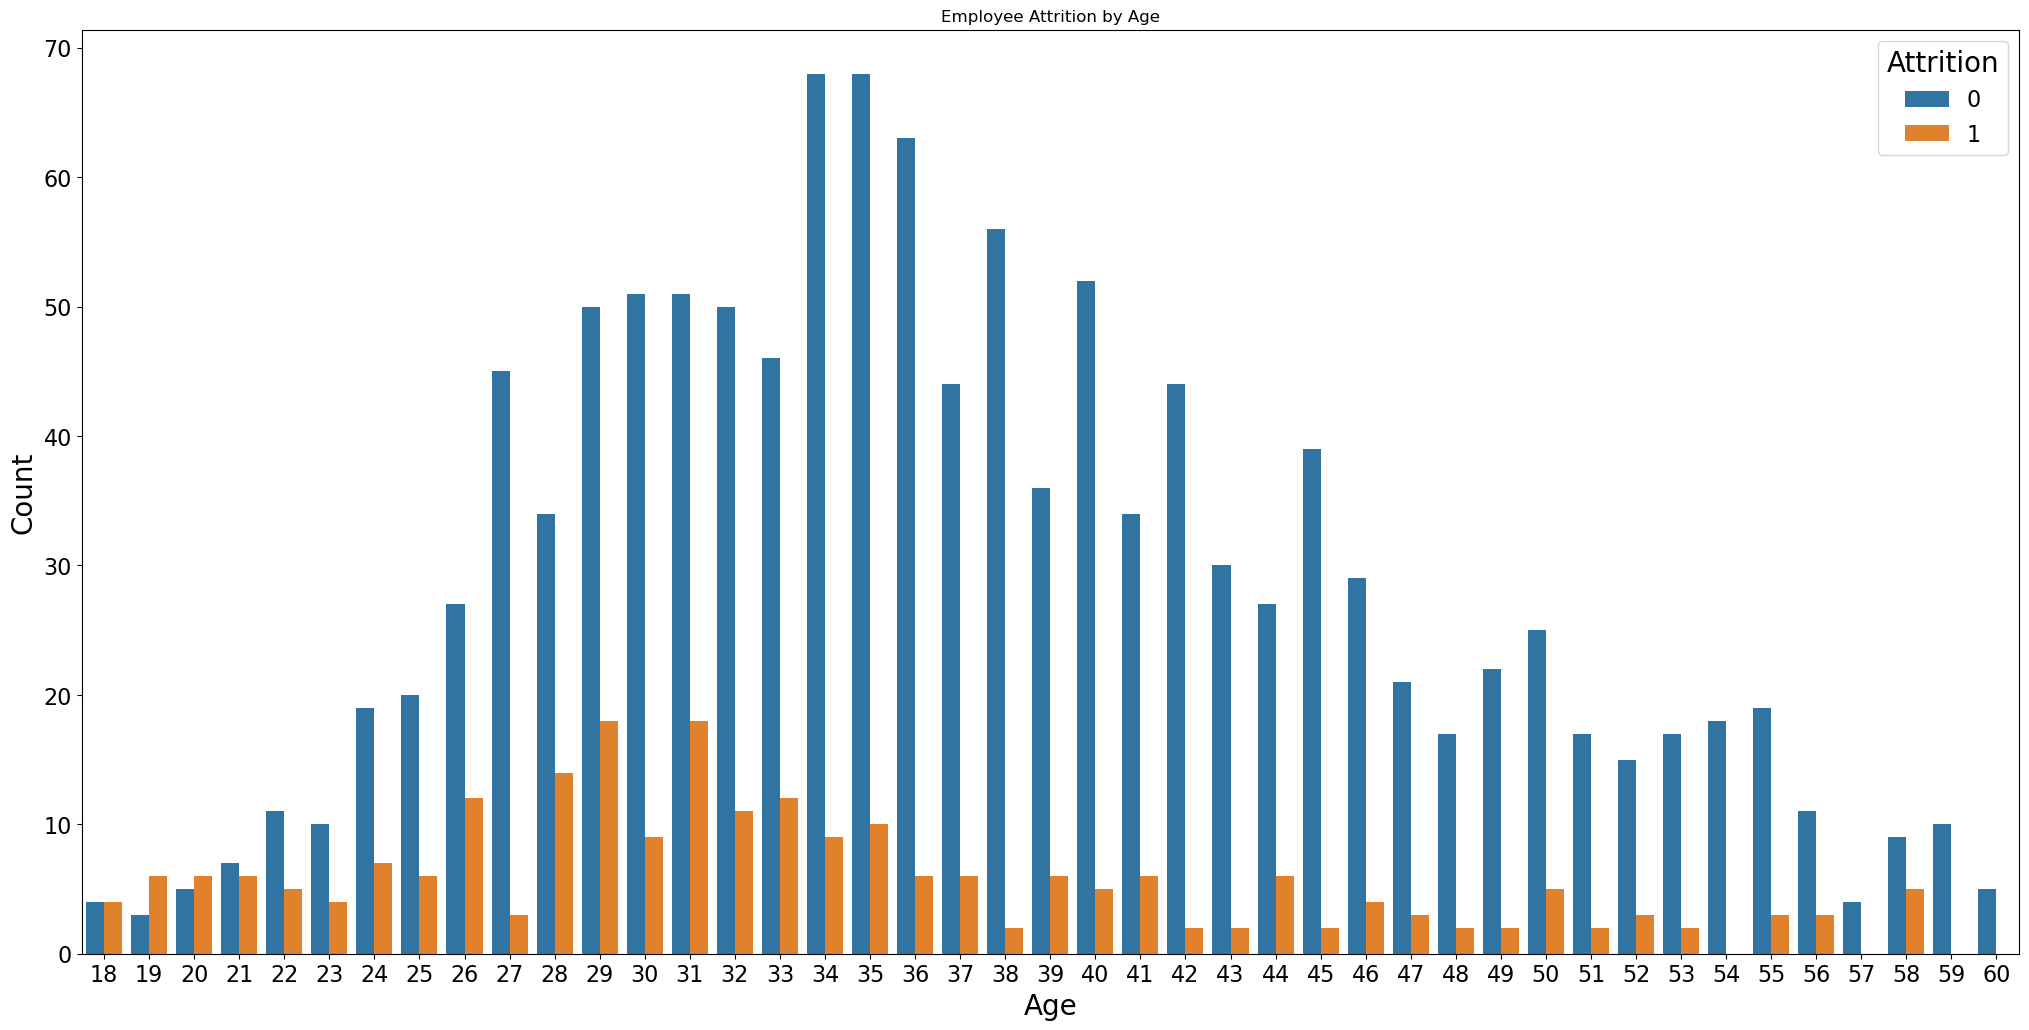

In [16]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Age')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Attrition', fontsize=16, title_fontsize=20);

# The orange bars (representing attrition) are generally smaller across all age groups compared to the blue bars
# (representing no attrition). This suggests that most employees stayed with the company across most age ranges.
# Attrition appears higher between the ages of 28 and 35, with ages 29 and 31 showing relatively more noticeable
# attrition compared to others.
# The peak age of employees in the company is between 28 and 36, as this range has the tallest blue bars
# (indicating the highest number of employees in these age groups). After age 40, the number of employees decreases gradually.
# Although there is some attrition across various ages, the highest numbers seem to be concentrated in the late 20s
# and early 30s. Employees younger than 25 and older than 45 experience less attrition compared to the middle-aged group
# (around 28 to 35).

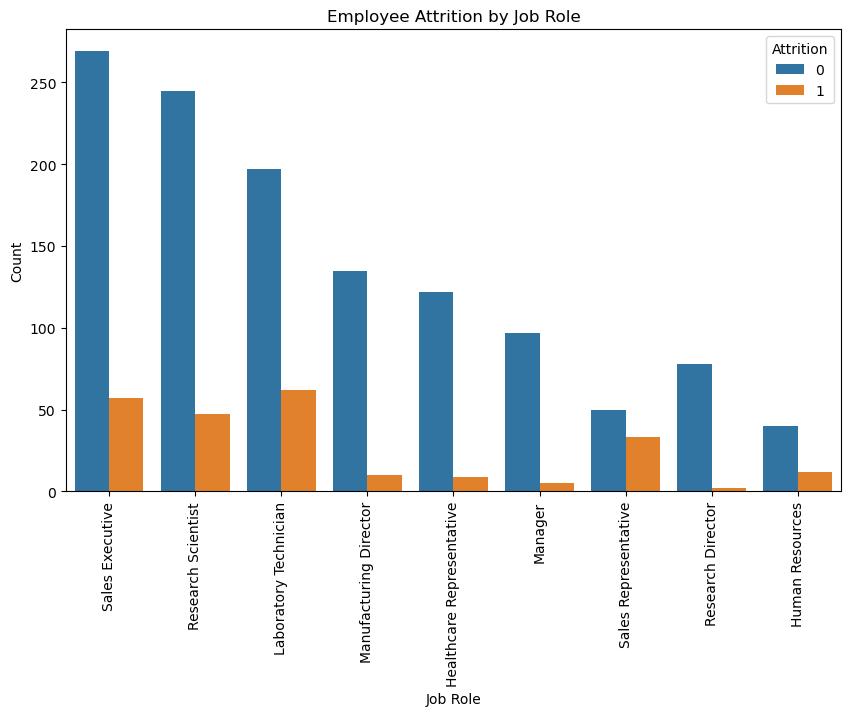

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90);

# Sales representatives are likelier to leave than employees in other positions.

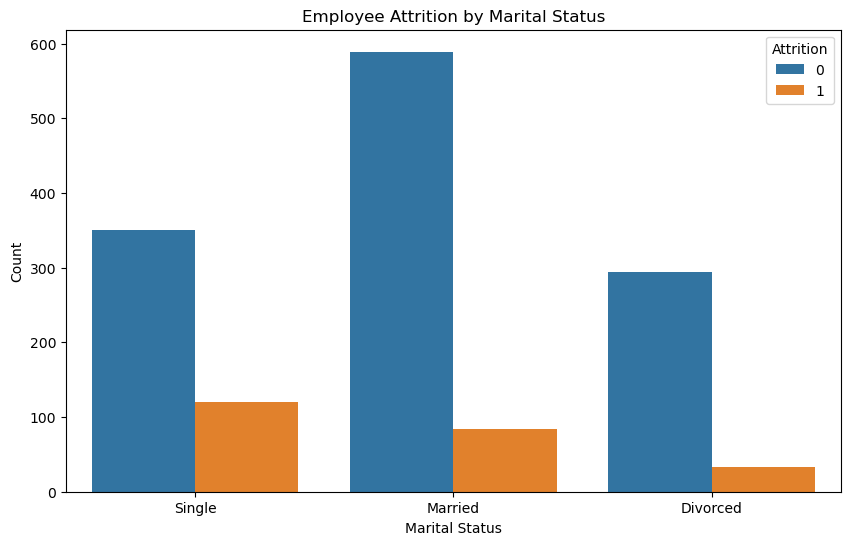

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count');

# Single employees are more likely to leave the company than those who are married or divorced.

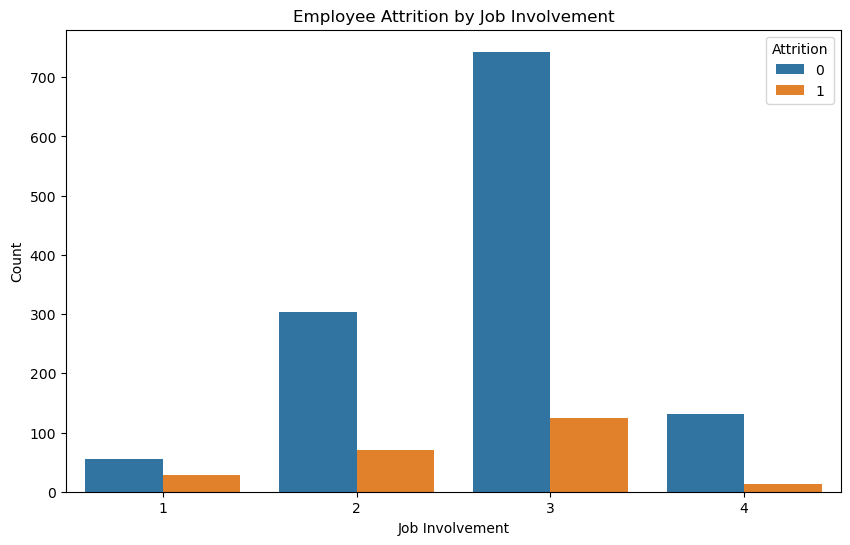

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Count');

# Employees who are less engaged are more likely to leave the company.

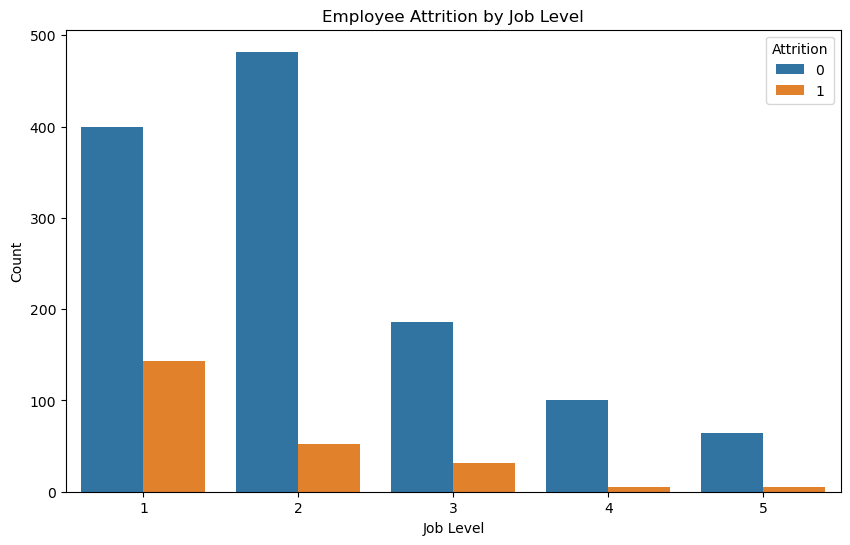

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.title('Employee Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count');

# Employees with lower job levels are more likely to leave the company.

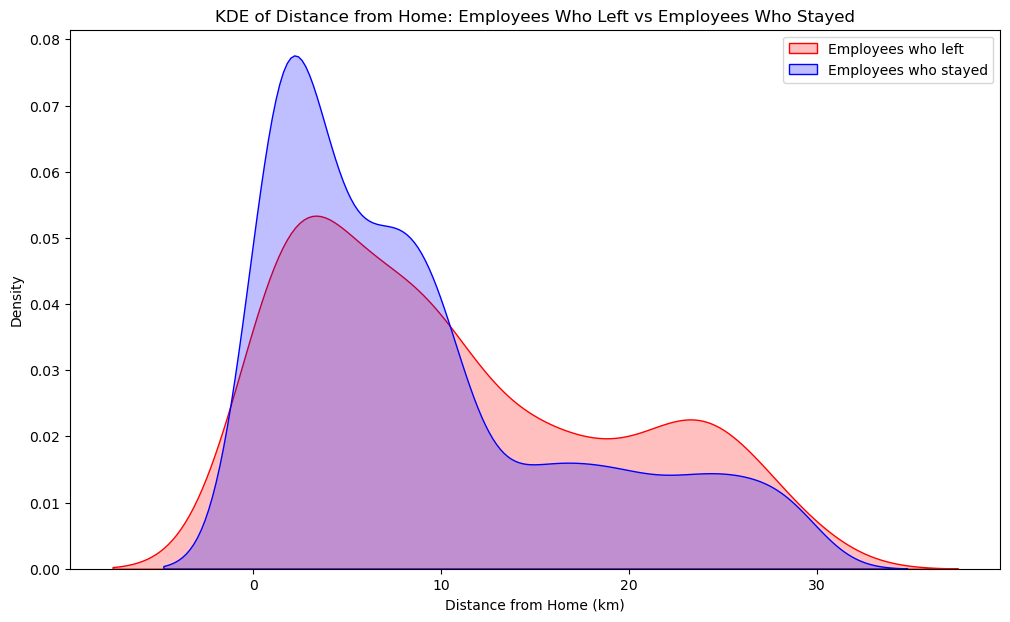

In [21]:
# KDE provides a smooth and continuous estimate of the probability density function (PDF) of a variable,
# unlike histograms which can be blocky and discrete. This smooth curve gives a clearer picture of
# the underlying data distribution, especially for continuous variables.

plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['DistanceFromHome'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Distance from Home: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Distance from Home (km)')
plt.ylabel('Density');

# The slight differences in the curves can indicate that employees living farther from their workplace
# may be more likely to leave.

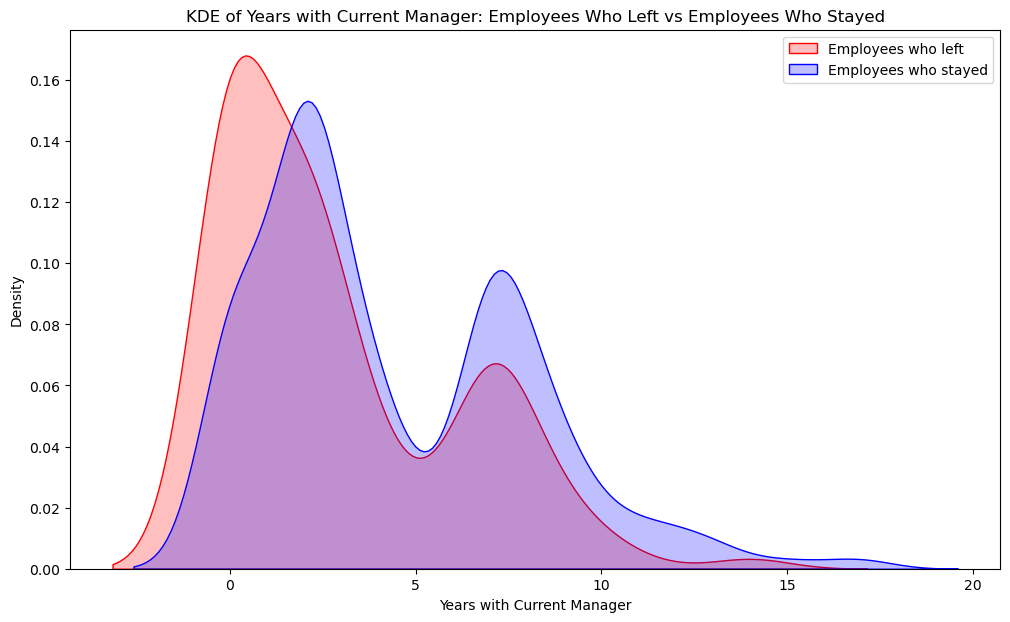

In [22]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['YearsWithCurrManager'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Years with Current Manager: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Years with Current Manager')
plt.ylabel('Density');

# Employees who left tended to have fewer years with their current manager than those who stayed.

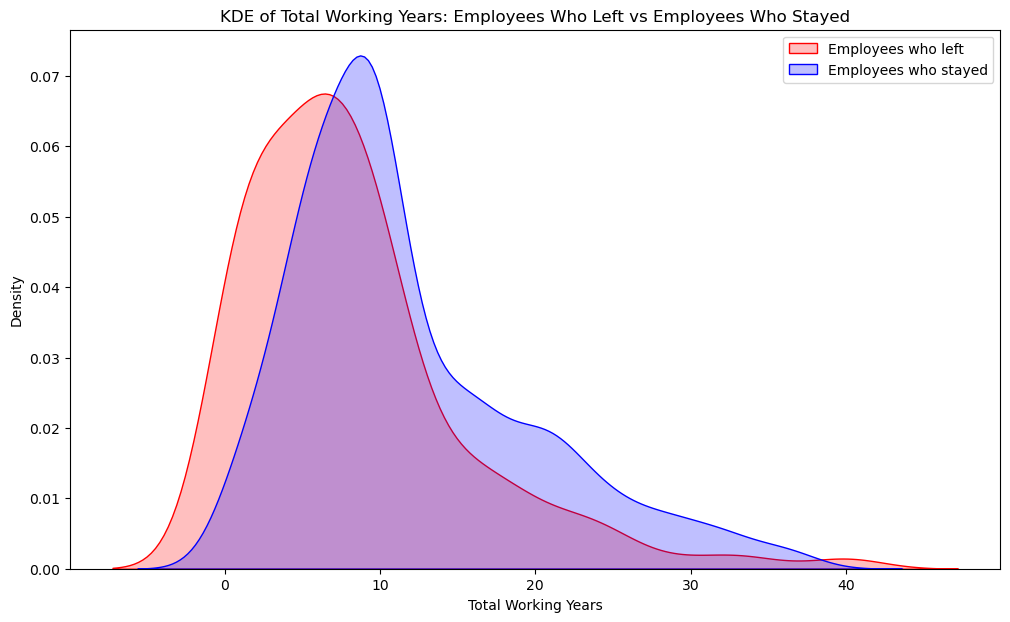

In [23]:
plt.figure(figsize=(12,7))
sns.kdeplot(employees_left['TotalWorkingYears'], label='Employees who left', fill=True, color='r')
sns.kdeplot(employees_stayed['TotalWorkingYears'], label='Employees who stayed', fill=True, color='b')
plt.legend()
plt.title('KDE of Total Working Years: Employees Who Left vs Employees Who Stayed')
plt.xlabel('Total Working Years')
plt.ylabel('Density');

# Employees who left generally had fewer total working years than those who stayed,
# with the distribution for those who stayed being more spread out towards higher total working years.

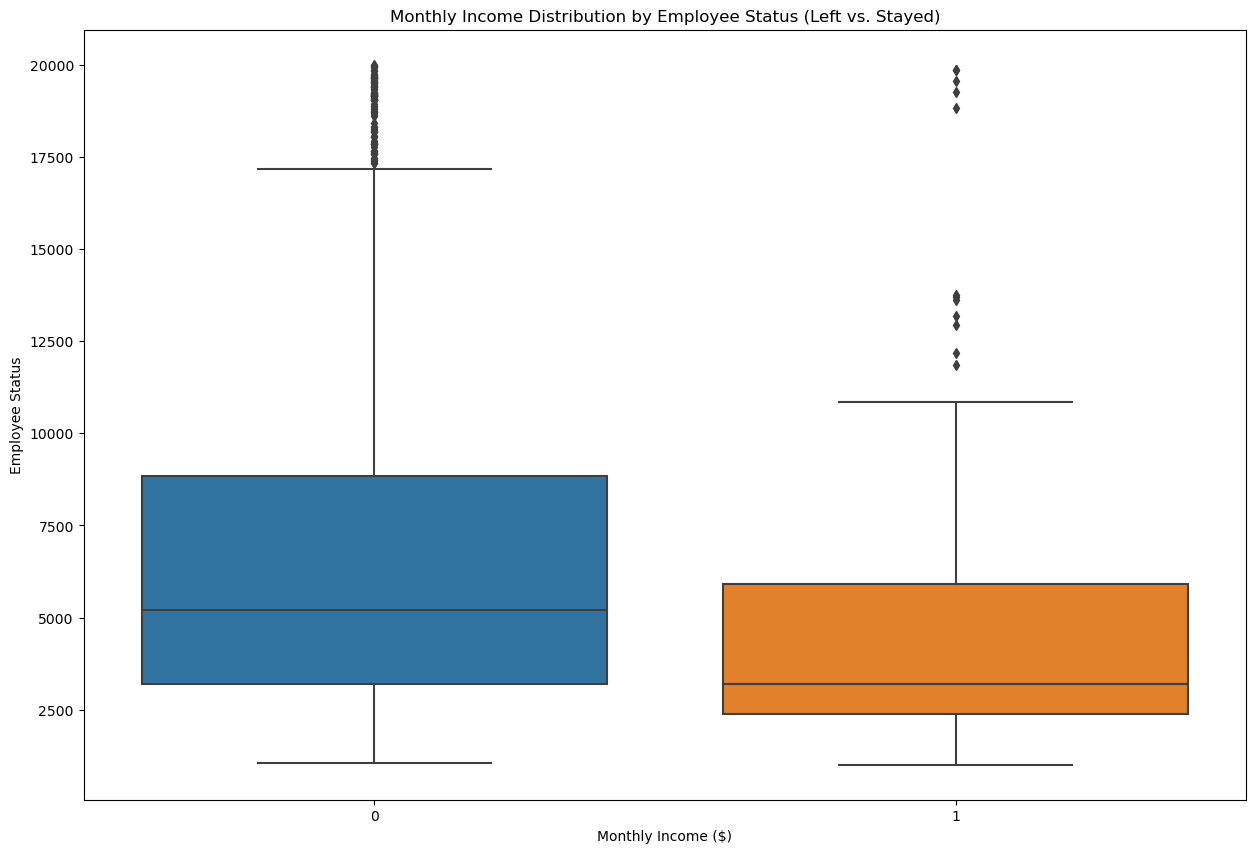

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# Employees who stayed (0) tend to have a wider distribution of monthly income,
# with higher median and upper ranges, while employees who left (1) generally have lower monthly incomes,
# as indicated by a lower median and a tighter range of values.

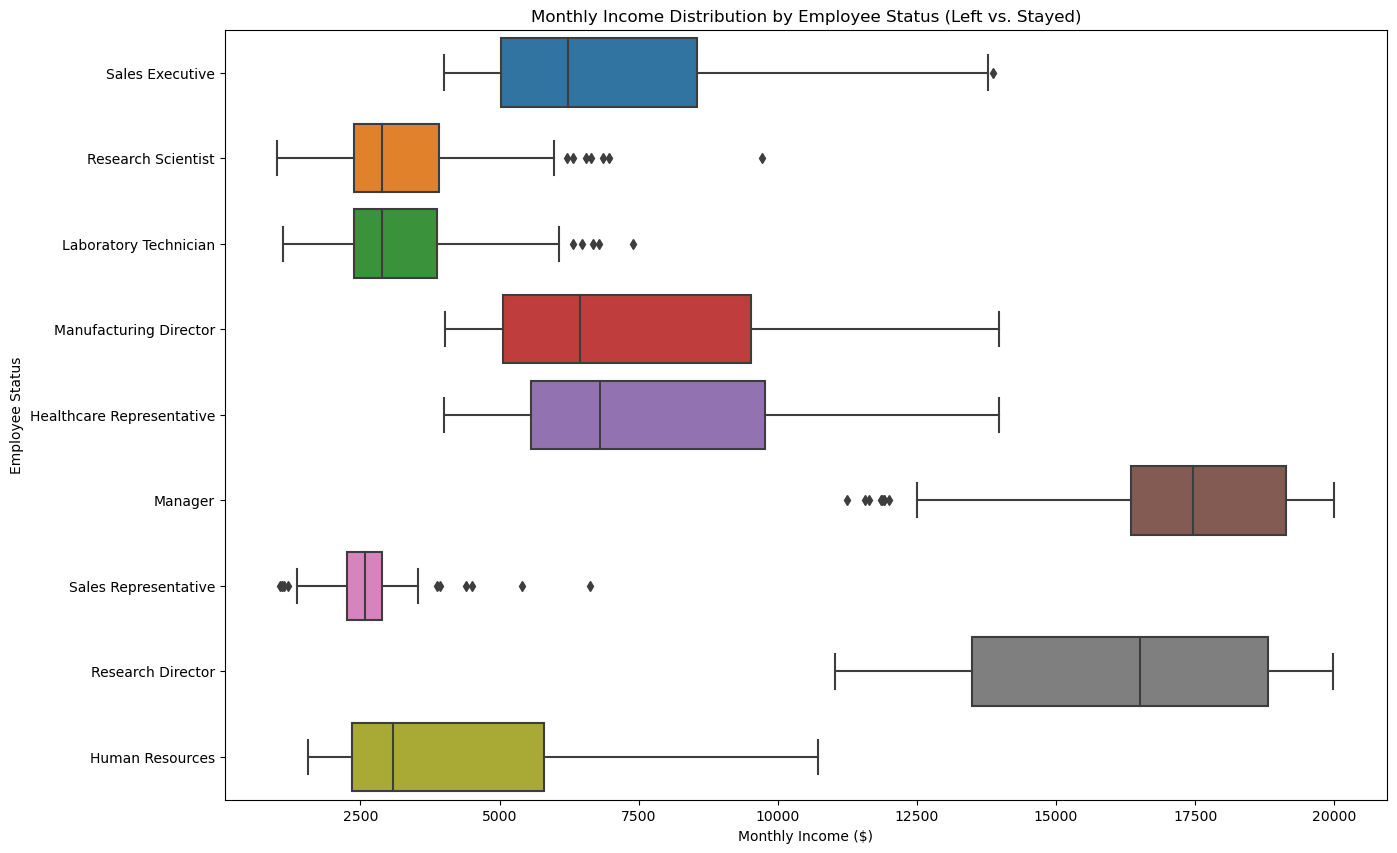

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)
plt.title('Monthly Income Distribution by Employee Status (Left vs. Stayed)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Employee Status');

# The monthly income distribution across different job roles highlights that roles such as Sales Executives
# and Research Directors have higher and broader income distributions,
# while positions like Sales Representatives and Laboratory Technicians tend to have lower and more compressed salary ranges.
# Additionally, several outliers exist across most roles, especially for Research Scientists,
# indicating some employees in these positions earn significantly more or less than the majority.

## Data Preprocessing: Splitting and Cleaning

In [27]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [28]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender',
                     'JobRole', 'MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [29]:
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
X_cat_encoded.shape

(1470, 26)

In [31]:
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))
X_cat_encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                           'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                           'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                           'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                           'YearsWithCurrManager']]
X_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [33]:
scaler = MinMaxScaler()
X_numerical_scaled_df = pd.DataFrame(scaler.fit_transform(X_numerical), columns=X_numerical.columns)
X_numerical_scaled_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [34]:
X = pd.concat([X_cat_encoded_df, X_numerical_scaled_df], axis=1)
X.columns = X.columns.astype(str) # to ensure column names are strings for consistency
X.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [35]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [36]:
# True positives (TP): The classifier predicted TRUE, and the correct class was TRUE.
# True negatives (TN): The classifier predicted FALSE, and the correct class was FALSE.
# False positives (FP) (Type I error): The classifier predicted TRUE, but the correct class was FALSE.
# False negatives (FN) (Type II error): The classifier predicted FALSE, but the correct class was TRUE.

# Accuracy = (TP+TN)/(TP+TN+FP+FN)
# Precision = TP/Total TRUE Predictions = TP/(TP+FP) (When the classifier predicted TRUE class,
# how often was it right?)
# Recall = TP/Actual TRUE = TP/(TP+FN) (When the class was TRUE,
# how often did the classifier get it right?)

## Logistic Regression: Model Training and Evaluation

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1102, 50)
(368, 50)


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

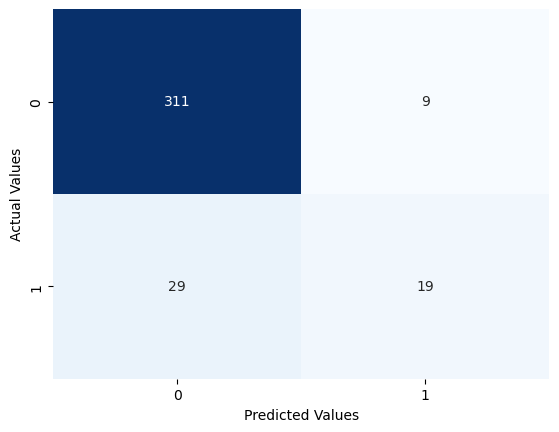

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False);
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [41]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



## Random Forest: Model Training and Evaluation

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

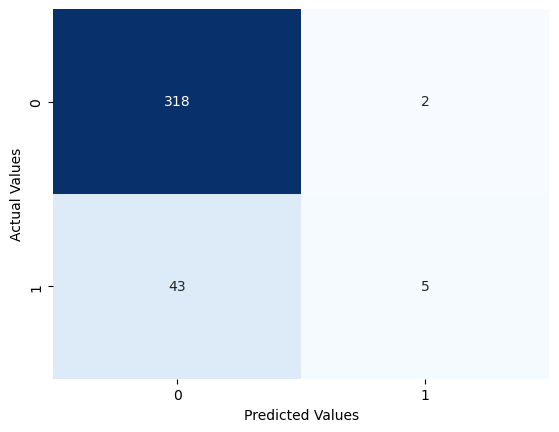

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

# The model performs well at identifying employees who stayed (high true negatives)
# but struggles more with identifying employees who left
# (lower true positives and higher false negatives).

In [45]:
print(classification_report(y_test, y_pred))

# The model performs well in identifying employees who stayed
# but struggles with identifying employees who left,
# as seen by the lower recall and F1-score for class 1.

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.71      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.80      0.55      0.56       368
weighted avg       0.86      0.88      0.84       368



# Marketing Department: Customer Segmentation for Targeted Campaigns

## Understanding the Business Problem

The bank's marketing team has collected extensive customer data over the past six months and aims to use segmentation analysis to divide customers into at least three distinct groups for a targeted ad campaign.

## Loading Data Files

In [47]:
marketing_df = pd.read_csv('../data/raw/marketing-department.csv')
marketing_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
